In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import auc, precision_recall_curve

In [2]:
df = pd.read_csv('./datasets/6-creditcard.csv')

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

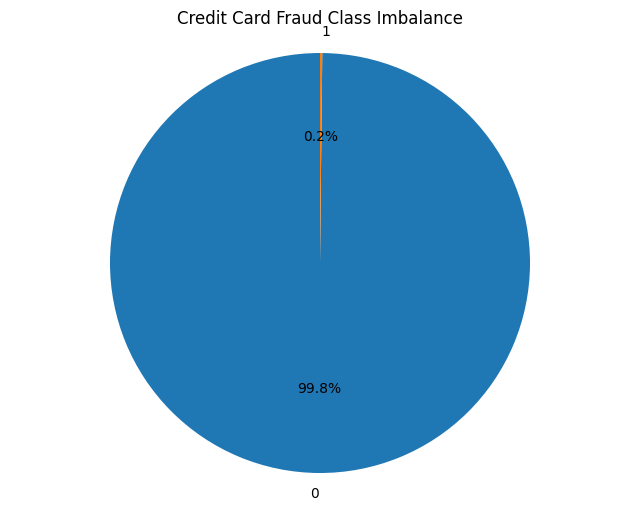

In [3]:
class_counts = df['Class'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Credit Card Fraud Class Imbalance')
plt.axis('equal')
plt.show()

In [4]:
smote = SMOTE(random_state=69)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

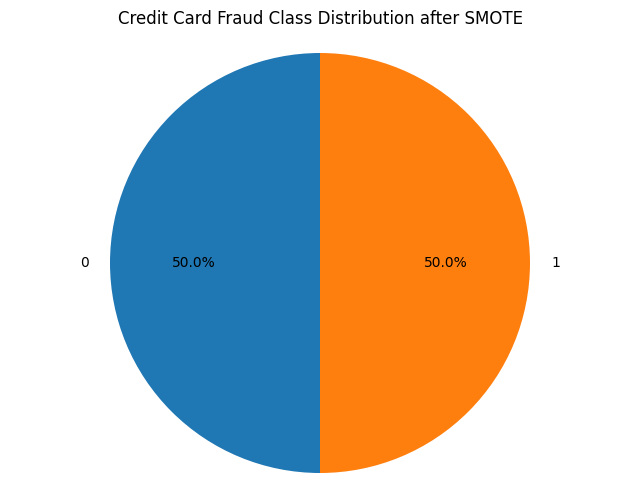

In [5]:
class_counts = pd.Series(y_train_resampled).value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Credit Card Fraud Class Distribution after SMOTE')
plt.axis('equal')
plt.show()

In [6]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
_ = model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=512, verbose=0)

In [7]:
y_pred_prob = model.predict(X_test_scaled, verbose=0)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auprc = auc(recall, precision)
print(f"AUPRC Accuracy: {(auprc * 100):.2f} %")

AUPRC Accuracy: 85.21 %
